In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2022/bestsellers_with_categories_2022_03_27.csv


# 1. Importing and Understanding the Dataset

**About Dataset:**

Amazon, the world’s no.1 e-commerce platform, offers best-selling books, new releases, and classics in every category including fiction, cookbooks, mystery, romance, thriller, historic, entrepreneurship, or books for kids.

* Present dataset contains information of Amazon's Top 50 bestselling books from 2009 to 2022 
* It contains list of 700 books and data is categorized into fiction and non-fiction using Goodreads

**Columns of dataset are as follows:**

There are 7 columns in a dataset, named as

* **Name** : Title of the book 
* **Author** : Name of the Author 
* **User Rating** : Rating given by user for each book
* **Reviews** : Total reviews recieved by users for each book
* **Price** : Price of novel in dollars
* **Year** : Year of Publishing
* **Genre** : Genre of Book, categorized into fiction and non-fiction


**Initial step towards analysing dataset is to import and understand dataset**
* pd.read_csv() method is used to import and read data in the form of dataframe
* .info() method is used to get vital information and a concise summary of the dataframe regarding columns, their datatypes, null values present in a dataset and memory usage

In [2]:
# Importing dataset - amazon-top-50-bestselling-books-2009-2022
df = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2022/bestsellers_with_categories_2022_03_27.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


In [3]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


* Dataset contains seven columns with 700 entries in each column
* No null records are present in any column
* Datatype assigned to each column are appropriate

# 2. Data Cleaning and Preparation

Data Preparation and Cleaning are crucial steps before EDA
* It helps in improving the quality of data by removing and replacing errors, missing values and duplicate records
* It makes dataset comprehensive and precise

**Following steps are performed:**

* Finding duplicate values using .duplicated() method
* Renaming column name using .rename() method


In [4]:
# Checking duplicate records
df[df.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [5]:
# Renaming column
df.rename(columns = {"Price":"Price($)"},inplace = True, errors = "raise")

In [6]:
df

,Name,Author,User Rating,Reviews,Price($),Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


# 3. Exploratory Data Analysis and Visualization

* Exploratory Data Analysis is a critical process of performing initial investigations on data 
* It summaries main characteristics of data with the help of statistics and graphical representations
* It lets us discover hidden patterns ,trends and outliers in a dataset

**a. Statistical Analysis**

.describe() method is used to obtain aggregated values of columns containing quantitative values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,700.0,4.639857,0.218586,3.3,4.50,4.7,4.8,4.9
Reviews,700.0,19255.195714,23613.443875,37.0,4987.25,10284.0,23358.0,208917.0
Price($),700.0,12.700000,9.915162,0.0,7.00,11.0,15.0,105.0
Year,700.0,2015.500000,4.034011,2009.0,2012.00,2015.5,2019.0,2022.0


**Following information can be inferred:**

* Dataset consist of books which are published starting from the year 2009 to 2022
* User ratings for books ranges from 3.3 to 4.9 out of 5
* Minimum reviews for a particular book is 37 by users
* Maximum number of reviews received by a particular book is 208917
* Price of books ranges from 0 to 15 dollars
* Amazon hardly sell free paperback or hardcover books, 0 dollar can be a price of an audiobook


**b. Visualization**

* Visualisation libraries give us the privilege to interact with the data by plotting various graphs
* Through visualization, we can extract valuable insights and correlation between different columns

**Here we are importing Matplotlib and Seaborn Libraries:**

* Matplotlib plots various graphs using Pandas and Numpy
* Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs

In [8]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

**a. Proportion of Fictional and Non-Fictional Books(2009-2022)**

In [9]:
# Counting total number of fictional books
fiction_len = len(df[df["Genre"] == "Fiction"])
fiction_len

312

In [10]:
# Counting total number of non -fictional books
nonfiction_len = len(df[df["Genre"] == "Non Fiction"])
nonfiction_len

388

In [11]:
data = [fiction_len,nonfiction_len]
data

[312, 388]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == "__main__":


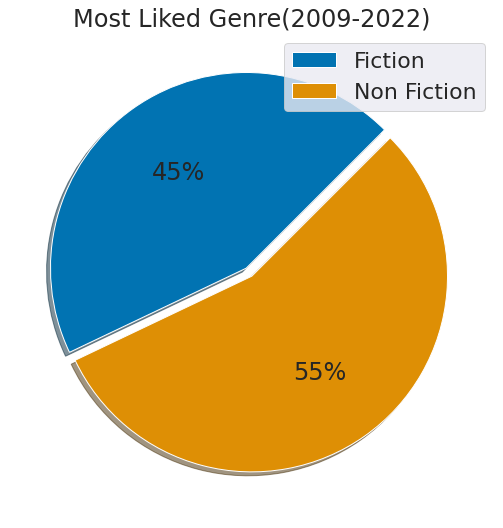

In [12]:
# Piechart
plt.figure(figsize = (20,9))

sns.set(font_scale=2,style = "darkgrid")
color = sns.color_palette("colorblind")
plt.pie(x = data, autopct = '%0.0f%%',shadow = 'True',explode=[0.05, 0.0],startangle=45, colors = color)
plt.title("Most Liked Genre(2009-2022)")

plt.legend(data,labels= ["Fiction","Non Fiction"] , loc="best")
plt.show()


**b. Number of Fiction vs Non Fiction books in Amazon's top-50 list from 2009-2022**

In [13]:
size = df.groupby(['Genre', 'Year']).size().reset_index(name='Counts')
size

,Genre,Year,Counts
0,Fiction,2009,24
1,Fiction,2010,20
2,Fiction,2011,21
3,Fiction,2012,21
4,Fiction,2013,24
5,Fiction,2014,29
6,Fiction,2015,17
7,Fiction,2016,19
8,Fiction,2017,24
9,Fiction,2018,21


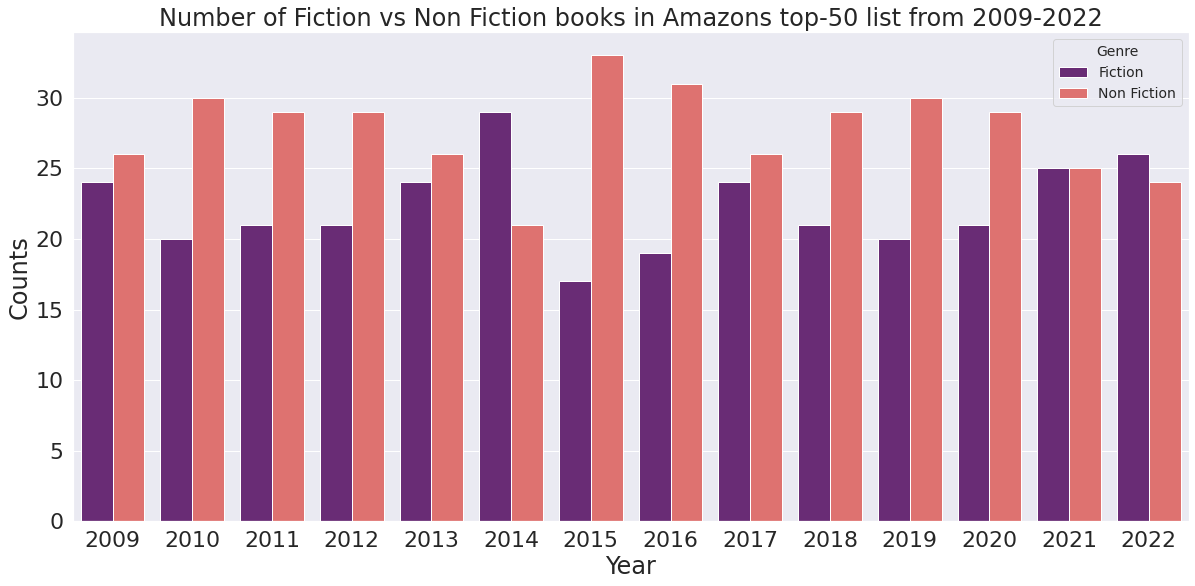

In [14]:
#Barplot
plt.figure(figsize = (20,9))
sns.barplot(x='Year', y='Counts', hue='Genre', data=size,palette = "magma").set(title='Number of Fiction vs Non Fiction books in Amazons top-50 list from 2009-2022')
plt.legend(title = "Genre",fontsize='14', title_fontsize='14')
plt.show()

**c. Total counts of books published per author**

In [15]:
author = df.groupby("Author").size().reset_index(name = "Counts").sort_values("Counts",ascending = False,ignore_index= True)
a = author.head(15)
a

,Author,Counts
0,Gary Chapman,14
1,Jeff Kinney,14
2,Suzanne Collins,12
3,American Psychological Association,11
4,Rick Riordan,11
5,Eric Carle,10
6,Dr. Seuss,10
7,Dav Pilkey,9
8,Gallup,9
9,Don Miguel Ruiz,9


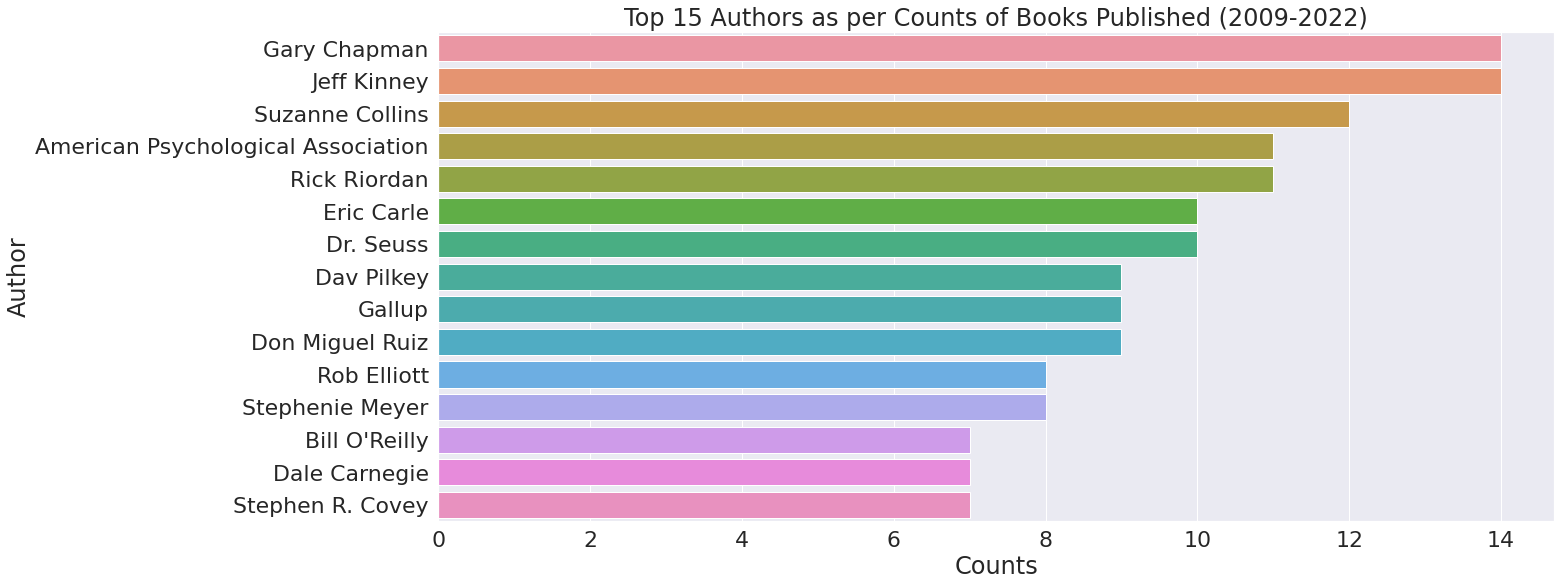

In [16]:
# Barplot
plt.figure(figsize =(20,9))
sns.set(font_scale = 2)
sns.barplot(x = a.Counts, y = a.Author,data = a)
plt.title("Top 15 Authors as per Counts of Books Published (2009-2022)")
plt.xlabel("Counts")
plt.ylabel("Author")

plt.show()

**d. Top 15 Most Published Books(2009-2022)**

In [17]:
book = df.groupby("Name").size().reset_index(name="Counts").sort_values("Counts",ascending = False,ignore_index = True)
b= book.head(15)
b

,Name,Counts
0,Publication Manual of the American Psychologic...,10
1,The Very Hungry Caterpillar,10
2,StrengthsFinder 2.0,9
3,The Four Agreements: A Practical Guide to Pers...,9
4,"Oh, the Places You'll Go!",8
5,The 5 Love Languages: The Secret to Love that ...,8
6,How to Win Friends & Influence People,7
7,The 7 Habits of Highly Effective People: Power...,7
8,Jesus Calling: Enjoying Peace in His Presence ...,6
9,The Wonderful Things You Will Be,6


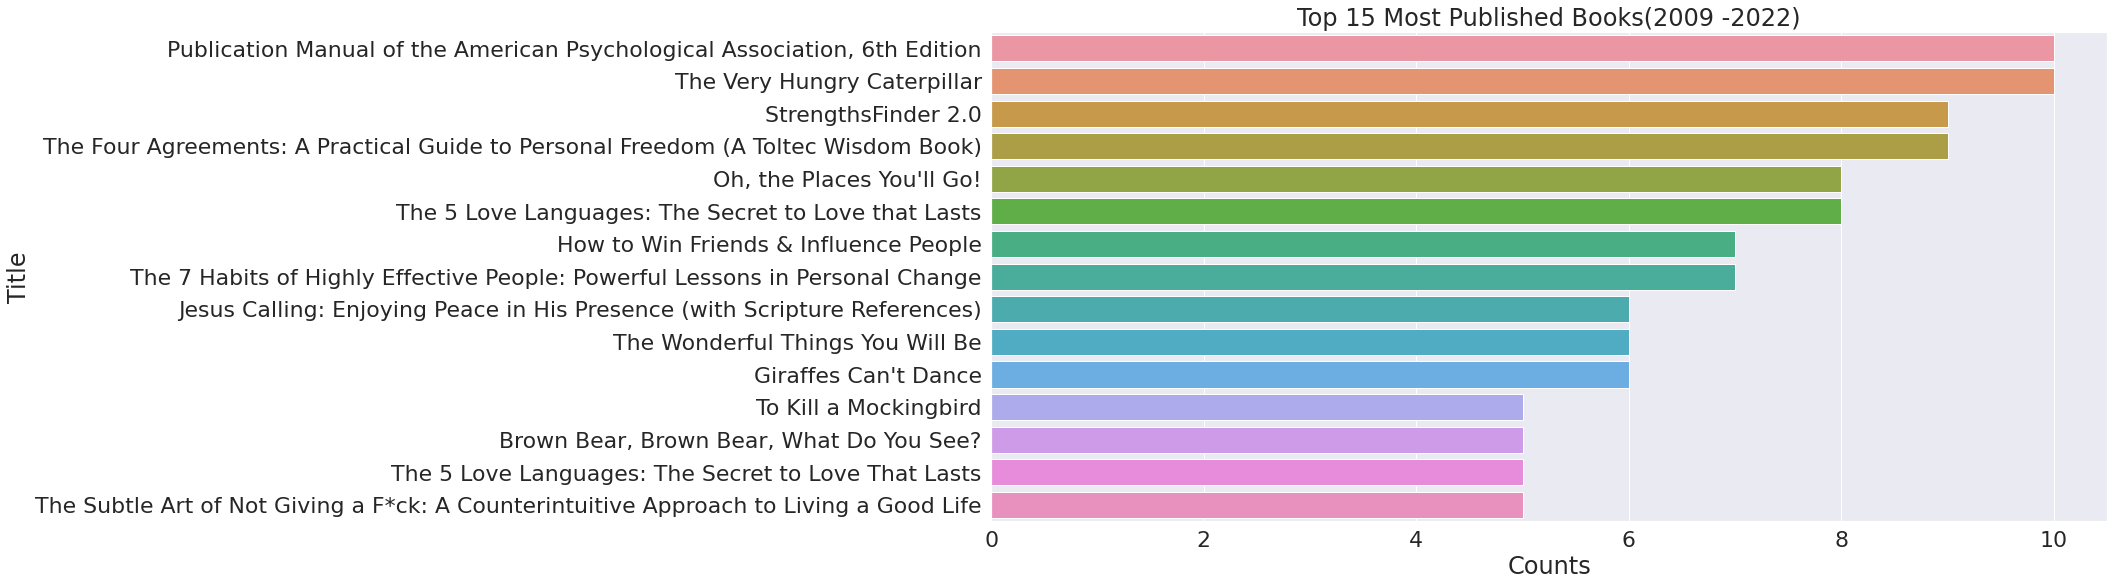

In [18]:
# Barplot
plt.figure(figsize =(20,9))
sns.set(font_scale = 2)
sns.barplot(x = b["Counts"], y = b["Name"], data = b)
plt.title("Top 15 Most Published Books(2009 -2022)")
plt.xlabel("Counts")
plt.ylabel("Title")

plt.show()

**e. Top 10 Highly Reviewed Books(2009-2022)**

In [19]:
rating = df.groupby("Name")["Reviews"].sum().sort_values(ascending= False).head(10)
total_rating = pd.DataFrame(rating)
total_rating

,Reviews
Name,
Where the Crawdads Sing,505673
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),367242
The 5 Love Languages: The Secret to Love that Lasts,315158
The Midnight Library: A Novel,288627
"The Boy, the Mole, the Fox and the Horse",281247
The Very Hungry Caterpillar,278602
How to Win Friends & Influence People,247571
Becoming,241033
If Animals Kissed Good Night,224261


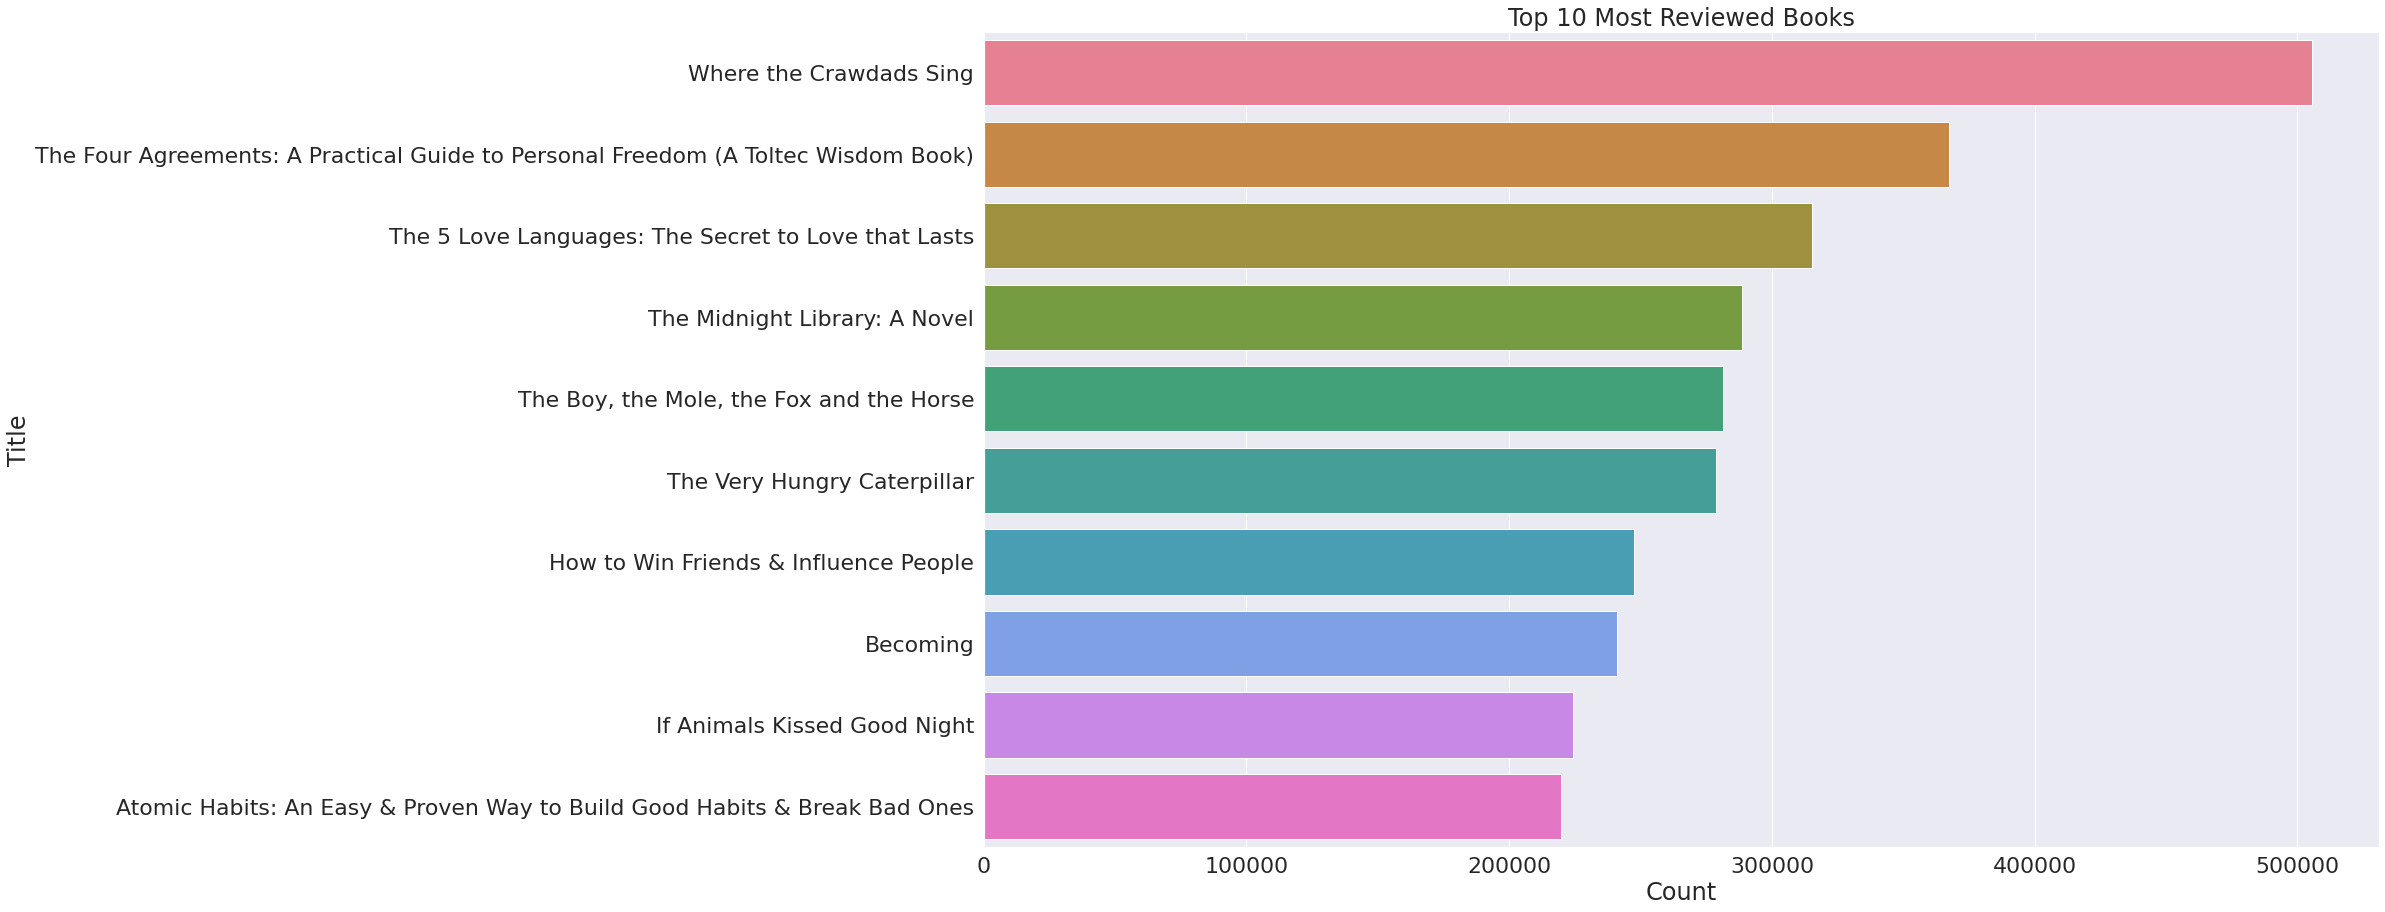

In [20]:
# Barplot
plt.figure(figsize =(25,15))
sns.set(font_scale = 2)

sns.barplot(x = total_rating.Reviews, y = total_rating.index,palette ="husl")
plt.title("Top 10 Most Reviewed Books")
plt.xlabel("Count")
plt.ylabel("Title")

plt.show()

# 4. Asking and Answering Questions

**a. What are the top five highly rated and reviewed books ?**

In [21]:
df.sort_values(["User Rating","Reviews"], ascending = False,ignore_index = True).head()

,Name,Author,User Rating,Reviews,Price($),Year,Genre
0,A Promised Land,Barack Obama,4.9,121109,16,2020,Non Fiction
1,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2020,Fiction
2,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2021,Fiction
3,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2022,Fiction
4,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2020,Fiction


**b. What are the five least rated and reviewed books ?**

In [22]:
df.sort_values(["User Rating","Reviews"], ascending = False,ignore_index = True).tail()

,Name,Author,User Rating,Reviews,Price($),Year,Genre
695,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
696,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
697,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
698,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
699,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


**c. What are the top 5 fictional book?**

In [23]:
# Groupby Genre
group = list(df.groupby("Genre"))
group

[('Fiction',
                                                    Name                 Author  \
  2            Breaking Dawn (The Twilight Saga, Book 4)        Stephenie Meyer   
  4    Dead And Gone: A Sookie Stackhouse Novel (Sook...       Charlaine Harris   
  5        Diary of a Wimpy Kid: The Last Straw (Book 3)            Jeff Kinney   
  7    Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...            Jeff Kinney   
  10                            Eclipse (Twilight Sagas)        Stephenie Meyer   
  ..                                                 ...                    ...   
  693                        The Very Hungry Caterpillar             Eric Carle   
  695                   The Wonderful Things You Will Be  Emily Winfield Martin   
  696                                 Ugly Love: A Novel         Colleen Hoover   
  697                                             Verity         Colleen Hoover   
  699                            Where the Crawdads Sing            Delia 

In [24]:
# Extraction first element of 0th index
fiction = group[0][1]
fiction

,Name,Author,User Rating,Reviews,Price($),Year,Genre
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
7,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
10,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,5505,7,2009,Fiction
...,...,...,...,...,...,...,...
693,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2022,Fiction
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction


In [25]:
fiction.sort_values(by = ['User Rating', 'Reviews'], ascending = False, na_position = 'first',ignore_index = True).head()

,Name,Author,User Rating,Reviews,Price($),Year,Genre
0,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2020,Fiction
1,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2021,Fiction
2,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2022,Fiction
3,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2020,Fiction
4,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2021,Fiction


**d. What are the top 5 non - fictional book?**

In [26]:
# Extraction first element of 1st index
non_fiction = group[1][1]
non_fiction

,Name,Author,User Rating,Reviews,Price($),Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
8,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
...,...,...,...,...,...,...,...
684,The Great Reset: Joe Biden and the Rise of Twe...,Glenn Beck,4.7,3098,18,2022,Non Fiction
690,"The Real Anthony Fauci: Bill Gates, Big Pharma...",Robert F. Kennedy Jr.,4.8,14575,20,2022,Non Fiction
692,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,64073,14,2022,Non Fiction
694,The Whole Body Reset: Your Weight-Loss Plan fo...,Stephen Perrine,4.2,206,20,2022,Non Fiction


In [27]:
non_fiction.sort_values(by = ['User Rating', 'Reviews'], ascending = False, na_position = 'first',ignore_index = True).head()

,Name,Author,User Rating,Reviews,Price($),Year,Genre
0,A Promised Land,Barack Obama,4.9,121109,16,2020,Non Fiction
1,American Marxism,Mark R. Levin,4.9,29510,14,2021,Non Fiction
2,"Magnolia Table, Volume 2: A Collection of Reci...",Joanna Gaines,4.9,24352,17,2020,Non Fiction
3,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
4,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction


# 5. Conclusions

Buying books online allow us to save some serious money along with time and introduces us to a huge variety of books that we may not even know exist. Amazon is one of the top online marketplace and a paradise for book lovers.It is one of the best places to begin your book search for each and every genre at affordable prices. It also let us get involved in discussions, reviews, and active conversation. Usually Rating and Review of books and authors are considered as important factors to decide the popularity among the readers. 

The dataset at hands reveals vital information regarding the top 50 best seller books from 2009-2022, which are as follows:
 
* **Books are categorized into fiction and non-fictional genres**
* **Non-Fictional books are popular amongst the users as it accounts 55 percentage of total books rated and reviewed**
* **Non-Fictional books are preferred over fictional books in each year except for the year 2022**
* **Authors, Gary Chapman and Jeff Kinney has published 14 books followed by Suzanne Collins who has published 12 books in the span of 14 years**
* **"Publication Manual of the American Psychological Association" by American Psychological Association and "The Very Hungry Caterpillar", a children’s picture book designed, illustrated, and written by Eric Carle were published 10 times and among top 50 Amazon best sellers**
* **"Where the Crawdads Sing", a murder mystery novel by American author Delia Owens is celebrated and most reviewed book with more than 5 lakhs reviews by users**
* **"The Casual Vacancy",a novel written by J.K. Rowling didnt succeed to catch reader's eye as compared to other books**	
* **"I Love You to the Moon and Back" written by Amelia Hepworth is most liked, rated and reviewed fictional children book**
* **"A Promised Land", a memoir by Barack Obama has won the heart of readers with an incredible user rating of 4.9 and reviews of more than 1 lakh in the year 2020 under the category of non-fictional novels**


# References

**Dataset:**
https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022

**Piechart:**
https://www.askpython.com/python/plot-customize-pie-chart-in-python

**Barplot:**
https://likegeeks.com/seaborn-barplot/ 
